# ML model Tfidf

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,random_state=42,test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit(X_train)
X_train = tfidf.transform(X_train)

X_train.shape

(51124, 26643)

In [ ]:
np.unique(Y_train,return_counts=True)

(array([0, 1]), array([26459, 24665]))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#multinomialNB
model = MultinomialNB()

kfold = KFold(n_splits=70,shuffle=True,random_state=42)

score_= cross_val_score(
    estimator = model,
    X = X_train,
    y = Y_train,
    cv = kfold,
    scoring = "accuracy",
    verbose = 3
)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.713, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.722, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.755, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.724, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.733, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.739, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.711, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.3s finished


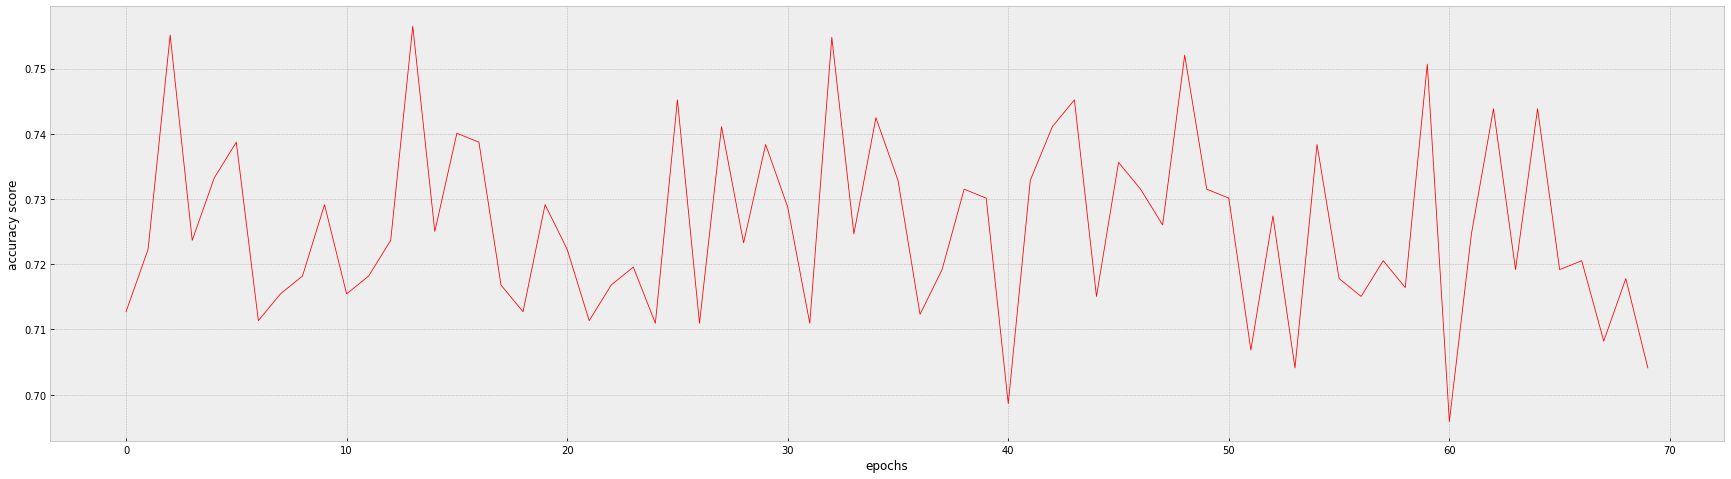

In [ ]:
plt.figure(figsize=(30,8))

plt.style.use("bmh")

plt.plot(range(70),score_,"r-",label="accuracy",linewidth=0.8)
plt.xlabel("epochs")
plt.ylabel("accuracy score")
plt.show()



# model.fit(X_train,Y_train)

In [ ]:
model.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# X_test = tfidf.transform(X_test)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

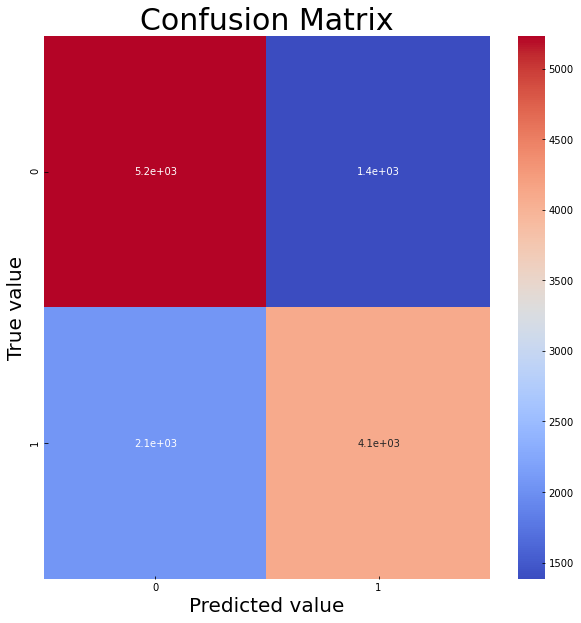

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="coolwarm")
plt.title("Confusion Matrix",fontdict={"fontsize":30})
plt.xlabel("Predicted value",fontdict={"fontsize":20})
plt.ylabel("True value",fontdict={"fontsize":20})
plt.show()




In [ ]:
from sklearn.metrics import accuracy_score,classification_report

report = classification_report(Y_test,y_pred)
print(report)
print("--"*30)
score_ = accuracy_score(Y_test,y_pred)
print(f"score_ : {round(score_*100,2)}% ")

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6615
           1       0.75      0.66      0.70      6166

    accuracy                           0.73     12781
   macro avg       0.73      0.73      0.73     12781
weighted avg       0.73      0.73      0.73     12781

------------------------------------------------------------
score_ : 73.01% 
